In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [255]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0         4.0
1  2018-01-04      1  address_0    product_1         4.0
2  2018-01-04      1  address_0    product_2         5.0
3  2018-01-04      1  address_0    product_3        10.0
4  2018-01-04      1  address_0    product_4         2.0


In [256]:
# Проверяем формат столбцов
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Дата          301355 non-null  object 
 1   Склад         301355 non-null  int64  
 2   Контрагент    301355 non-null  object 
 3   Номенклатура  301355 non-null  object 
 4   Количество    301355 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 11.5+ MB


Сразу переведем столбец "Дата" в правильный формат

In [257]:
df['Дата'] = pd.to_datetime(df['Дата'])

1. Напишите собственную реализацию вычисления `mean`, `median`, `variance`, `standard deviation`

In [258]:
# Собственная реализация для среднего
def custom_mean(data):
    return sum(data) / len(data)

# Собственная реализация для медианы
def custom_median(data):
    sorted_data = sorted(data)
    n = len(sorted_data)
    mid = n // 2
    if n % 2 == 0:
        return (sorted_data[mid - 1] + sorted_data[mid]) / 2
    else:
        return sorted_data[mid]

# Собственная реализация для дисперсии
def custom_variance(data):
    n = len(data)
    mean = custom_mean(data)
    return sum((x - mean) ** 2 for x in data) / (n - 1)

# собственная реализация для стандартного отклонения
def custom_std(data):
    return np.sqrt(custom_variance(data))

Проверка собственной реализации

In [259]:
# Тестовые данные
test_data = df['Количество']

# Отображение результатов с помощью собственных реализаций
mean_result = custom_mean(test_data)
median_result = custom_median(test_data)
variance_result = custom_variance(test_data)
std_result = custom_std(test_data)

print('Собственная реализация: ', mean_result, median_result, variance_result, std_result)
print('Библиотека numpy:       ', np.mean(test_data), np.median(test_data), np.var(test_data), np.std(test_data))

Собственная реализация:  2.951558792785917 2.0 8.988926164089813 2.998153792601342
Библиотека numpy:        2.951558792785917 2.0 8.98889633572737 2.9981488181421834


In [260]:
# Сгруппируйте данные по дате, возьмите сумму продаж
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index().sort_values('Дата')

# Вывести несколько первых строк сгруппированных данных
grouped_df.head()

,Дата,Количество
0,2018-01-04,3734.0
1,2018-01-05,3643.0
2,2018-01-06,3193.0
3,2018-01-07,3298.0
4,2018-01-09,4055.0


2. Нарисуйте график продаж у `grouped_df`

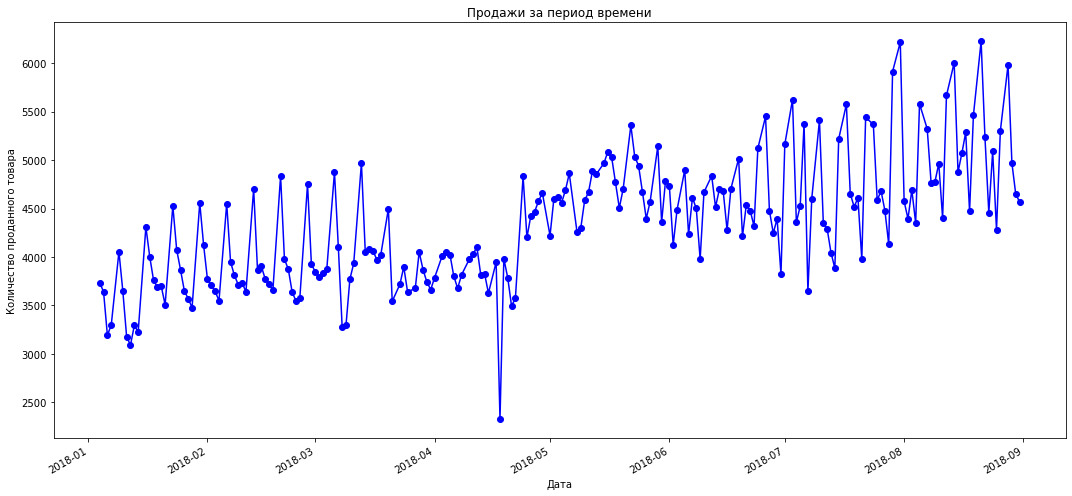

In [261]:
# График продаж
plt.figure(figsize=(15, 7))
plt.plot(grouped_df['Дата'], grouped_df['Количество'], marker='o', linestyle='-', color='b')

ax = plt.gca() 
ax.xaxis.set_major_locator(mdates.MonthLocator())

plt.gcf().autofmt_xdate()
plt.title('Продажи за период времени')
plt.xlabel('Дата')
plt.ylabel('Количество проданного товара')
plt.tight_layout()

plt.show()

3. Опишите что вы видите на графике. Ваша задача - максимально описать график

In [262]:

#   На графике выше представлены объемы продаж, просуммированные за каждую дату, что позволяет наглядно увидеть динамику продаж с течением времени.
#   Можем наблюдать колебания количества продаж с течением времени. На нем видны максимумы и минимумы, указывающие на дни с более высокими и 
#низкими объемами продаж соответственно. Эти колебания могут быть вызваны множеством факторов, таких как рекламные акции, праздники или дни 
#пополнения запасов. 
#   Также в целом мы видим нарастающий тренд из января в август
#  Также мы видим резкое падение продаж между 2018-04 и 2018-05 

4. Распечатайте объект, у которого максимальный выброс (нужно найти выброс у `df`)

In [263]:
max_outlier_row = df.loc[df['Количество'] == df['Количество'].max()]

max_outlier_row

,Дата,Склад,Контрагент,Номенклатура,Количество
218822,2018-06-28,1,address_208,product_0,200.0


5. Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [264]:
# Создание копии данных
warehouse_3_df = df[df['Склад'] == 3].copy()

# Новый столбец для дня недели
warehouse_3_df['DayOfWeek'] = warehouse_3_df['Дата'].dt.dayofweek

# Фильтр по средам (dayofweek == 2), так как отсчет идет от Понедельника как 0
wednesdays_df = warehouse_3_df[warehouse_3_df['DayOfWeek'] == 2]

# Фильтр для июня, июля и августа (месяц 6, 7, 8)
summer_df = wednesdays_df[wednesdays_df['Дата'].dt.month.isin([6, 7, 8])]

# Группировка по продуктам и сумма количеств
top_products_summer = summer_df.groupby('Номенклатура')['Количество'].sum().reset_index()

# Самый продаваемый товар
top_selling_product = top_products_summer.loc[top_products_summer['Количество'].idxmax()]

top_selling_product

Номенклатура    product_1
Количество         2267.0
Name: 1, dtype: object

6. Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане, сделайте слияние температуры с `grouped_df`, и нарисуйте график `y=['Количество', 'T']`

In [265]:
df['Дата'].min(), df['Дата'].max()

(Timestamp('2018-01-04 00:00:00'), Timestamp('2018-08-31 00:00:00'))

In [266]:
#  чтение данных
weather_df = pd.read_csv('Архив_погоды_в_Астанеfrom04012018to31082018_.csv', encoding='utf-8', skiprows=6, delimiter=';', decimal=',', na_values='—')

# Обработка данных
weather_df = weather_df.reset_index().rename(columns={'index': 'Дата и время', 'Местное время в Астане': 'Temp'})
weather_df = weather_df.drop(columns=[col for col in weather_df.columns if col not in ['Дата и время', 'Temp']])

# Создание даты
weather_df['Дата и время'] = pd.to_datetime(weather_df['Дата и время'], dayfirst=True)
weather_df['Дата'] = pd.to_datetime(weather_df['Дата и время'], dayfirst=True).dt.date
weather_df['Temp'] = pd.to_numeric(weather_df['Temp'])

# Финальный датафрейм
final_weather_df = weather_df.groupby('Дата').mean().reset_index().sort_values('Дата')

final_weather_df.head()

,Дата,Temp
0,2018-01-04,-14.0750
1,2018-01-05,-16.8625
2,2018-01-06,-13.3000
3,2018-01-07,-12.7500
4,2018-01-08,-15.4125


In [267]:
# Слияние данных
grouped_df['Дата'] = pd.to_datetime(grouped_df['Дата']).dt.date.astype('object')

merged_df = pd.merge(grouped_df, final_weather_df, on='Дата', how='inner')
merged_df.head()

,Дата,Количество,Temp
0,2018-01-04,3734.0,-14.0750
1,2018-01-05,3643.0,-16.8625
2,2018-01-06,3193.0,-13.3000
3,2018-01-07,3298.0,-12.7500
4,2018-01-09,4055.0,-6.2500


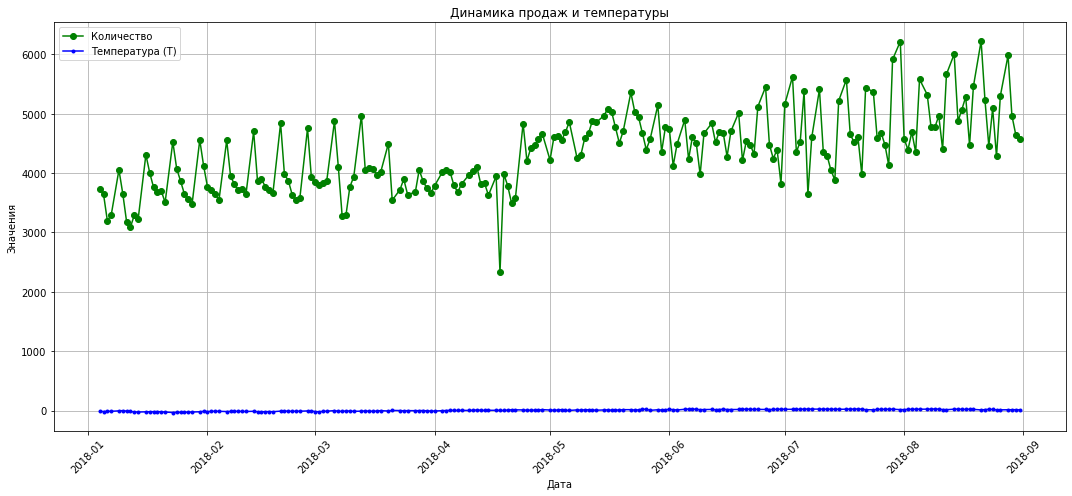

In [268]:
# Построение графика
plt.figure(figsize=(15, 7))
plt.plot(merged_df['Дата'], merged_df['Количество'], label='Количество', color='g', marker='o', linestyle='-')
plt.plot(merged_df['Дата'], merged_df['Temp'], label='Температура (T)', color='b', marker='.', linestyle='-')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.ylabel('Значения')
plt.title('Динамика продаж и температуры')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

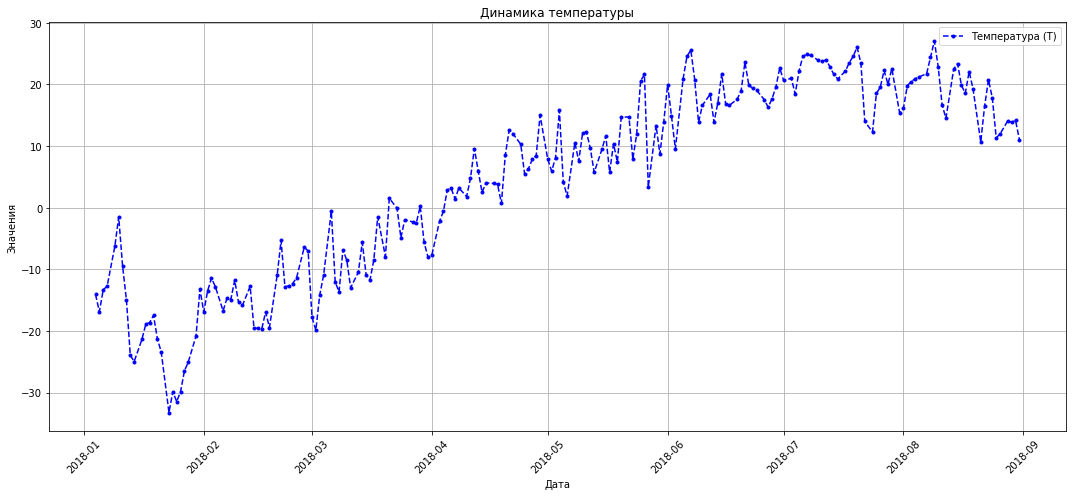

In [269]:
# Отдельно температура
plt.figure(figsize=(15, 7))
plt.plot(merged_df['Дата'], merged_df['Temp'], label='Температура (T)', color='b', marker='.', linestyle='--')
plt.xlabel('Дата')
plt.xticks(rotation=45)
plt.ylabel('Значения')
plt.title('Динамика температуры')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()